# Agriculture Field

In [1]:
# Importing the required libraries and reading the data

import pandas as pd

data = pd.read_csv("qs.crops_20240921.csv",sep='\t')

In [2]:
# Sorting the data by year
data = data.sort_values(by="YEAR",ascending=False)

In [3]:
# Collecting the past 8 years data
years = data["YEAR"].unique()[0:8]
data = data[data["YEAR"].isin(years)]

In [4]:
# visualizing the data
data

,SOURCE_DESC,SECTOR_DESC,GROUP_DESC,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,UTIL_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,...,LOCATION_DESC,YEAR,FREQ_DESC,BEGIN_CODE,END_CODE,REFERENCE_PERIOD_DESC,WEEK_ENDING,LOAD_TIME,VALUE,CV_%
1278927,SURVEY,CROPS,CROP TOTALS,SOIL,SUBSOIL,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"MOISTURE, PREVIOUS YEAR",PCT SURPLUS,"SOIL, SUBSOIL - MOISTURE, PREVIOUS YEAR, MEASU...",...,WEST VIRGINIA,2023.0,WEEKLY,19.0,19.0,WEEK #19,2023-05-14,2023-05-15 16:00:00,7,NaN
1112776,SURVEY,CROPS,FIELD CROPS,WHEAT,WINTER,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"PROGRESS, PREVIOUS YEAR",PCT HEADED,"WHEAT, WINTER - PROGRESS, PREVIOUS YEAR, MEASU...",...,WISCONSIN,2023.0,WEEKLY,24.0,24.0,WEEK #24,2023-06-18,2023-06-20 16:00:00,71,NaN
2069648,SURVEY,CROPS,FRUIT & TREE NUTS,PEACHES,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"PROGRESS, 5 YEAR AVG",PCT PETAL FALL,"PEACHES - PROGRESS, 5 YEAR AVG, MEASURED IN PC...",...,NEW HAMPSHIRE,2023.0,WEEKLY,21.0,21.0,WEEK #21,2023-05-28,2023-05-30 16:00:00,58,NaN
2904210,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,PROGRESS,PCT EMERGED,"CORN - PROGRESS, MEASURED IN PCT EMERGED",...,VIRGINIA,2023.0,WEEKLY,18.0,18.0,WEEK #18,2023-05-07,2023-05-08 16:00:00,48,NaN
2213579,SURVEY,CROPS,FIELD CROPS,WHEAT,WINTER,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"CONDITION, 5 YEAR AVG",PCT GOOD,"WHEAT, WINTER - CONDITION, 5 YEAR AVG, MEASURE...",...,MICHIGAN,2023.0,WEEKLY,22.0,22.0,WEEK #22,2023-06-04,2023-06-05 16:00:00,48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693232,SURVEY,CROPS,FIELD CROPS,PEANUTS,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,PROGRESS,PCT PEGGING,"PEANUTS - PROGRESS, MEASURED IN PCT PEGGING",...,US TOTAL,2016.0,WEEKLY,31.0,31.0,WEEK #31,2016-08-07,2016-08-08 16:06:14,95,NaN
2442561,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,CONDITION,PCT EXCELLENT,"CORN - CONDITION, MEASURED IN PCT EXCELLENT",...,NORTH DAKOTA,2016.0,WEEKLY,40.0,40.0,WEEK #40,2016-10-09,2016-10-11 16:06:07,17,NaN
2143752,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,PRODUCTION,BU,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",...,"KENTUCKY, PURCHASE, CARLISLE",2016.0,ANNUAL,0.0,0.0,YEAR,NaN,2017-02-23 15:00:08,"4,195,000",NaN
392199,SURVEY,CROPS,FIELD CROPS,OATS,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,CONDITION,PCT EXCELLENT,"OATS - CONDITION, MEASURED IN PCT EXCELLENT",...,IOWA,2016.0,WEEKLY,26.0,26.0,WEEK #26,2016-07-03,2016-07-05 16:07:18,15,NaN


In [5]:
# dropping the columns which are not required for our outcome of intrest 
data =data.drop(columns = {"SOURCE_DESC",'SECTOR_DESC','PRODN_PRACTICE_DESC','UTIL_PRACTICE_DESC','STATISTICCAT_DESC','UNIT_DESC','SHORT_DESC',
                   'DOMAIN_DESC','DOMAINCAT_DESC','AGG_LEVEL_DESC','STATE_ANSI','STATE_FIPS_CODE','STATE_ALPHA','ASD_CODE','ASD_DESC','COUNTY_ANSI',
                    'COUNTY_CODE','COUNTY_NAME','REGION_DESC','ZIP_5','WATERSHED_CODE','WATERSHED_DESC','CONGR_DISTRICT_CODE','COUNTRY_CODE',
                    'COUNTRY_NAME','LOCATION_DESC','FREQ_DESC','BEGIN_CODE','END_CODE','REFERENCE_PERIOD_DESC','WEEK_ENDING','LOAD_TIME', 'CV_%'})

In [6]:
# using simple imputer from scikit-learn to handle the missing values
from sklearn.impute import SimpleImputer

categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = data.select_dtypes(include=["number"]).columns.tolist()

# Replacing the null values in numerical columns with mean
imputer_numerical = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_numerical.fit_transform(data[numerical_cols])

# Replacing the null values in categorical columns with most-frequent item in the feature
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

In [7]:
# Changing the data type of value 
data["VALUE"] = pd.to_numeric(data["VALUE"], errors='coerce')

In [8]:
values_to_drop = ['FIELDWORK', 'PASTURELAND', 'SOIL']

data = data[~data['COMMODITY_DESC'].isin(values_to_drop)]

# Data Visualization

In [9]:
Data = data[['STATE_NAME', 'YEAR', 'VALUE']]

# Getting unique places
Places = Data["STATE_NAME"].unique()[0:20]
data_Places = Data[Data["STATE_NAME"].isin(Places)]

sums = data_Places.groupby(["STATE_NAME", "YEAR"])["VALUE"].sum().reset_index()



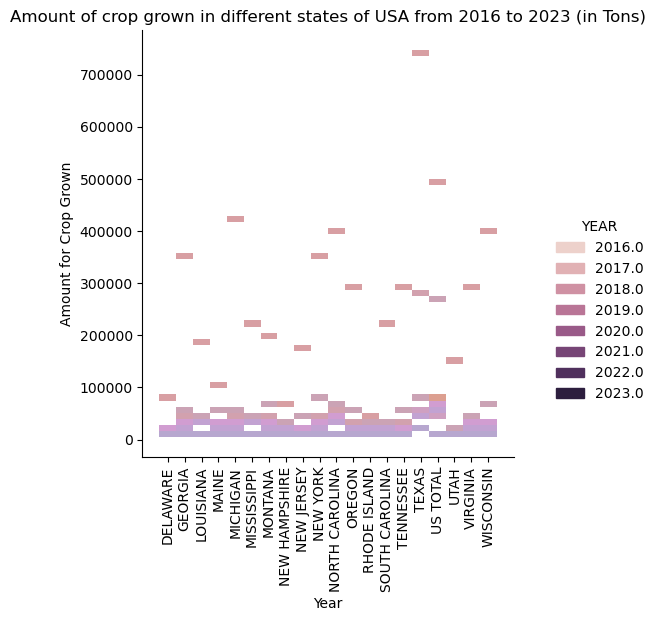

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (18, 10)
sns.displot(data = sums,x="STATE_NAME",y="VALUE",hue="YEAR")
plt.xticks(rotation=90)
plt.title('Amount of crop grown in different states of USA from 2016 to 2023 (in Tons)')
plt.xlabel('Year')
plt.ylabel('Amount for Crop Grown')
plt.savefig("Amount of crop grown in different states of USA.png",dpi=72)
plt.show()

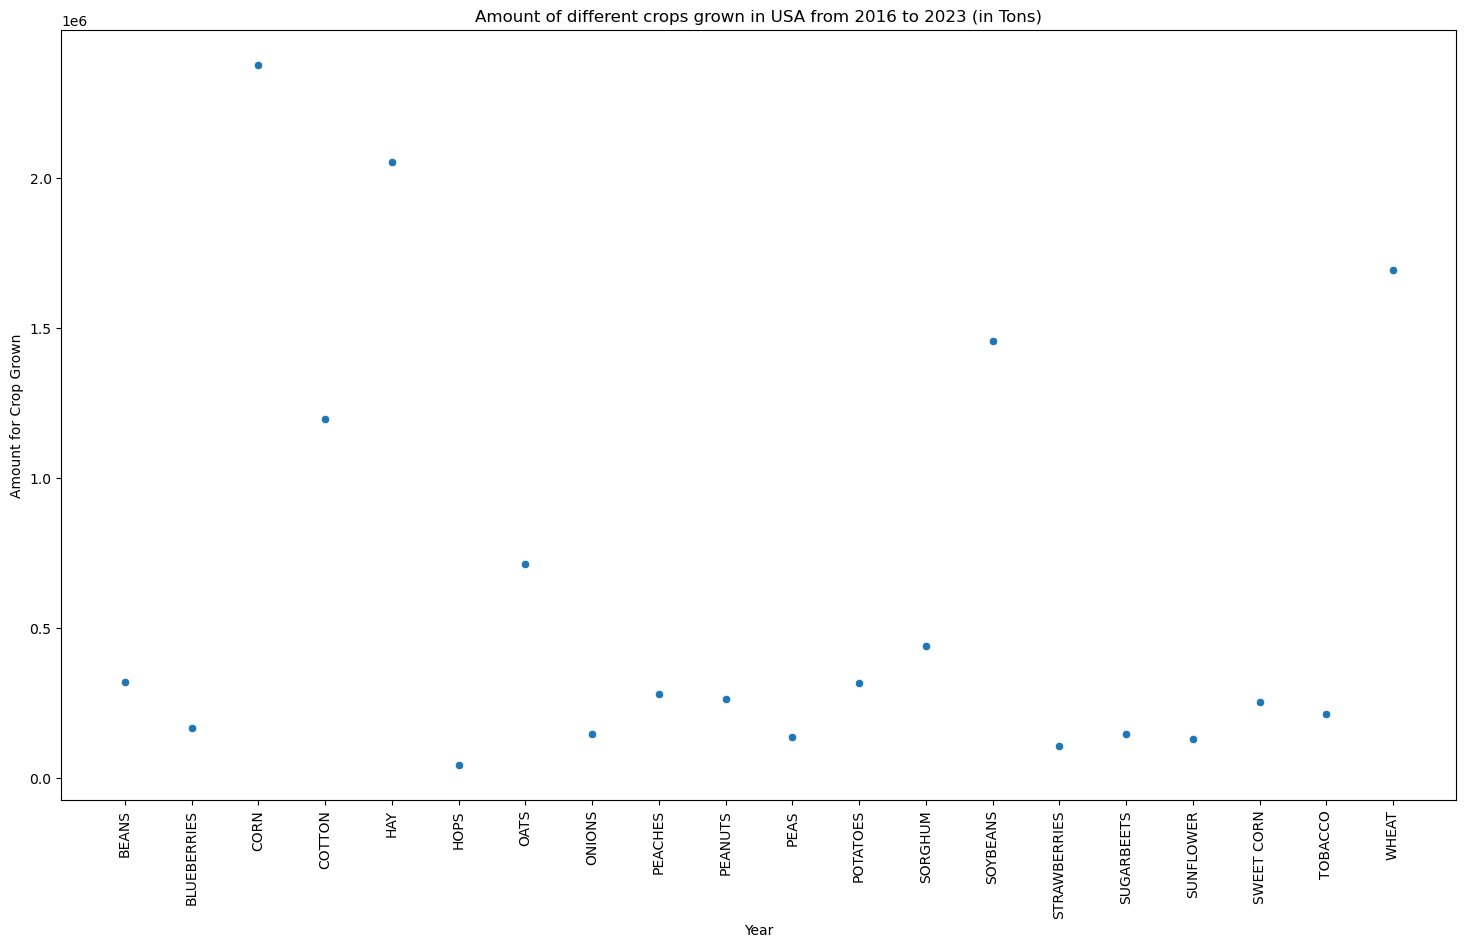

In [11]:
Commodity= data["COMMODITY_DESC"].unique()[0:20]
data_Places = data[data["COMMODITY_DESC"].isin(Commodity)]

sum_by_commodity = data_Places.groupby(["COMMODITY_DESC"])["VALUE"].sum().reset_index()

plt.rcParams["figure.figsize"] = (18, 10)
sns.scatterplot(data = sum_by_commodity,x="COMMODITY_DESC",y="VALUE")
plt.title('Amount of different crops grown in USA from 2016 to 2023 (in Tons)')
plt.xlabel('Year')
plt.ylabel('Amount for Crop Grown')
plt.xticks(rotation=90)
plt.savefig("Amount of different crops grown in USA.png",dpi=72)
plt.show()

In [12]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['GROUP_DESC'] = Le.fit_transform(data['GROUP_DESC'])
data['COMMODITY_DESC'] = Le.fit_transform(data['COMMODITY_DESC'])
data['STATE_NAME'] = Le.fit_transform(data['STATE_NAME'])
data['CLASS_DESC'] = Le.fit_transform(data['CLASS_DESC'])

In [13]:
# Applying the standardization to the numerical features such that all the features will be on same scale which is required for the model to perform analysis effectively
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

data[['YEAR']] = standardscaler.fit_transform(data[['YEAR']])
data[['VALUE']] = standardscaler.fit_transform(data[['VALUE']])



In [14]:
# Arranging the columns as desired
data = data[[data.columns[0]] + data.columns.tolist()[2:]+  [data.columns[1]]]


In [15]:
# Identifying the outliers using IQR and removing them
Q1 = data["VALUE"].quantile(0.25)
Q3 = data["VALUE"].quantile(0.75)
IQR = Q3 - Q1

data = data[(data["VALUE"] >= (Q1 - 1.5 * IQR)) & (data["VALUE"] <= (Q3 + 1.5 * IQR))]


In [16]:
# Visualizing the data after encoding ans standardization
data.head(5)

,GROUP_DESC,CLASS_DESC,STATE_NAME,YEAR,VALUE,COMMODITY_DESC
1112776,2,918,55,3.004737,0.006419,244
2069648,3,42,30,3.004737,0.003024,171
2904210,2,42,52,3.004737,0.000412,56
2213579,2,918,23,3.004737,0.000412,244
794129,2,42,33,3.004737,0.010859,156
